In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
import seaborn as sns
from tqdm import tqdm

In [26]:
exp_iter = 10
dims = [10, 25, 50, 75, 100]
result_gd = np.zeros([len(dims), exp_iter])
for j, p in enumerate(dims):
    for i in range(exp_iter):
        gan = GAN(p, 0.1)
        gan.dist_init('mu', 0, 5)
        gan.data_init(1000, 3)
        gan.model_init()
        gan.optimizer_init(0.5, 0.5, 0.95, 1e-5, 3e-5, 1, 1, False, 0.1)
        gan.fit(3000, 1e-7, True)
        result_gd[j, i] = gan.score(10)
        

  0%|          | 2/3000 [00:00<03:06, 16.04it/s]


converged at 2 step


100%|██████████| 3000/3000 [02:03<00:00, 24.33it/s]


In [27]:
result_gd

array([[0.32028475, 0.15459424, 0.19357747, 0.17260104, 0.10594037,
        0.17217343, 0.17766672, 0.18676236, 0.19159018, 0.10308999],
       [0.32068283, 0.23158534, 0.30276238, 0.35400076, 0.27553463,
        0.2694791 , 0.25382198, 0.39158825, 0.293012  , 0.29960128],
       [0.33898092, 0.31850403, 0.34688258, 0.47852123, 0.50337015,
        0.374708  , 0.35586362, 0.37733786, 0.52301023, 0.36852989],
       [0.43793667, 0.47861176, 0.64114978, 0.57619101, 0.42229769,
        0.39002105, 0.3778395 , 0.67787643, 0.37154097, 0.44551214],
       [0.45557429, 0.47251175, 0.53119557, 0.79743382, 0.50444509,
        0.7899052 , 1.64072774, 0.6923943 , 0.7177562 , 0.52114216]])

In [29]:
mean_gd, std_gd = np.mean(result_gd, axis=1), np.std(result_gd, axis=1)

In [16]:
exp_iter = 10
dims = [10, 25, 50, 75, 100]
result_100 = np.zeros([exp_iter])
for i in range(exp_iter):
    gan = GAN(100, 0.1)
    gan.dist_init('mu', 0, 5)
    gan.data_init(1000, 3)
    gan.model_init()
    gan.optimizer_init(1, 1.5, 0.8, 1e-5, 3e-5, 1, 1, True, 0.1)
    gan.fit(100, 1e-7, True)
    result_100[i] = gan.score(10)

100%|██████████| 100/100 [01:13<00:00,  1.37it/s]


In [19]:
np.std(result_100), np.mean(result_100)

(0.20133719056016153, 0.8452187262673426)

In [10]:
result

array([[0.09284239, 0.14186942, 0.15490787, 0.13224802, 0.27039015,
        0.19424239, 0.17925195, 0.14344824, 0.10720997, 0.17011322],
       [0.21514431, 0.20728155, 0.22348905, 0.23657232, 0.13942462,
        0.25935668, 0.23584933, 0.23619975, 0.24854009, 0.20929594],
       [0.35512064, 0.35251314, 0.35084726, 0.32573541, 0.32740832,
        0.59895927, 0.38876469, 0.3721108 , 0.35810087, 0.38638296],
       [0.54085904, 0.60082841, 0.56521111, 0.61141233, 0.42628225,
        0.61090029, 0.43076568, 0.62384157, 0.86741448, 0.4765932 ],
       [0.73136397, 0.63964332, 0.85372156, 0.87644097, 0.98403274,
        0.83949086, 1.21834258, 0.83321573, 0.64916756, 1.06127829]])

<ErrorbarContainer object of 3 artists>

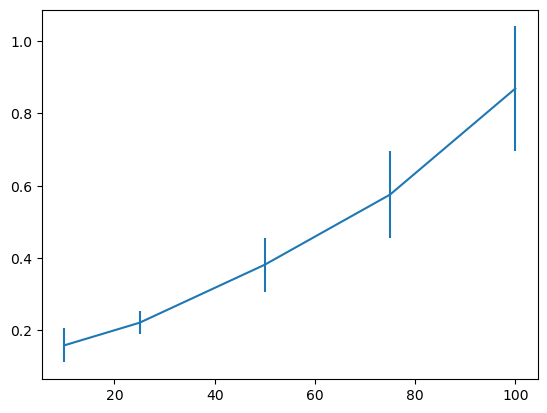

In [11]:
sd = np.std(result, axis=1)
mean = np.mean(result, axis=1)
plt.errorbar(dims, mean, sd)

In [15]:
mean, sd

(array([0.15865236, 0.22111536, 0.38159434, 0.57541084, 0.86866976]),
 array([0.04744364, 0.03153379, 0.07517449, 0.12043159, 0.17162668]))

In [20]:
sd[-1] = 0.20133719056016153
mean[-1] = 0.8452187262673426

In [12]:
# median
exp_iter = 10
dims = [10, 25, 50, 75, 100]
result = np.zeros([len(dims), exp_iter])
for j, p in enumerate(dims):
    for i in range(10):
        gan = GAN(p, 0.1)
        gan.dist_init('mu', 0, 5)
        gan.data_init(1000, 3)
        gan.model_init()
        gan.optimizer_init(0.02 * gan.data_dim, 0.95, 1e-5, 1e-5, 5, 1, True, 0.1)
        gan.fit(1, 1e-7, verbose=False)
        result[j, i] = gan.l2_loss[0]

<ErrorbarContainer object of 3 artists>

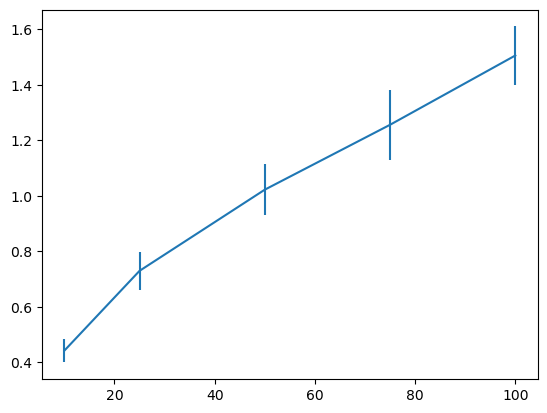

In [13]:
sd = np.std(result, axis=1)
mean = np.mean(result, axis=1)
plt.errorbar(dims, mean, sd)

# 要素ごとの中央値

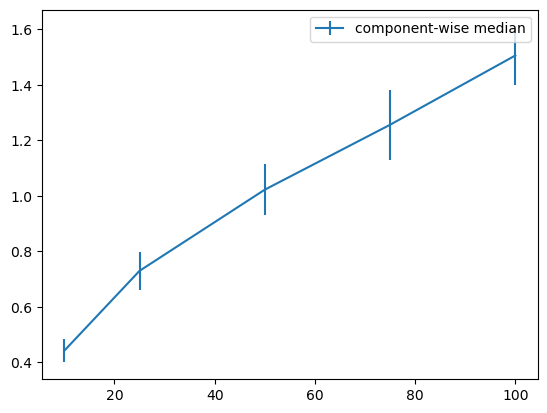

In [19]:
mean_cm, sd_cm = np.array([0.44239473, 0.72967008, 1.02204266, 1.25574672, 1.50527871]), np.array([0.04279821, 0.06932521, 0.09155913, 0.12511502, 0.1045442 ])
plt.errorbar(dims, mean, sd, label='component-wise median')
plt.legend()

In [25]:
mean_stv, std_stv

(array([0.15865236, 0.22111536, 0.38159434, 0.57541084, 0.84521873]),
 array([0.04744364, 0.03153379, 0.07517449, 0.12043159, 0.20133719]))

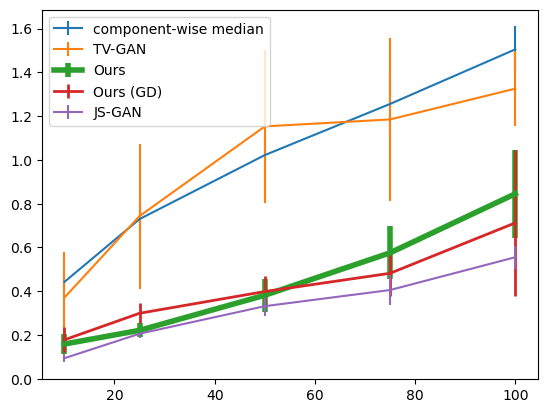

In [39]:
mean_js = [0.0938 , 0.2058 ,0.3316 ,0.4054, 0.5553]
std_js = [0.0195, 0.0218, 0.0462, 0.0690, 0.0518]
mean_tv = [0.3707,0.7434,1.1532, 1.1850, 1.3257]
std_tv = [0.2102,0.3313,0.3488,0.3739,0.1721]
mean_cm, sd_cm = np.array([0.44239473, 0.72967008, 1.02204266, 1.25574672, 1.50527871]), np.array([0.04279821, 0.06932521, 0.09155913, 0.12511502, 0.1045442 ])
mean_stv, std_stv = np.array([0.15865236, 0.22111536, 0.38159434, 0.57541084, 0.84521873]), np.array([0.04744364, 0.03153379, 0.07517449, 0.12043159, 0.20133719])
plt.errorbar(dims, mean_cm, sd_cm, label='component-wise median')
plt.errorbar(dims, mean_tv, std_tv, label='TV-GAN')
plt.errorbar(dims, mean_stv, std_stv, label='Ours', lw=4)
plt.errorbar(dims, mean_gd, std_gd, label='Ours (GD)', lw=2)
plt.errorbar(dims, mean_js, std_js, label='JS-GAN')
plt.legend()